Let ${\cal T}=\{0, \delta t, 2 \, \delta t, 3 \, \delta t, ..., n \, \delta t=T\}$ be a discrete time grid. Here $n$ is the number of steps in our grid.

### Brownian Motion

**Definition:** $Z_t$ follows discrete time Brownian motion with initial value $Z_0$, drift $\tilde{\mu}$ and volatility $\sigma>0$ if it satisfies 

$$Z_{t+\delta t}=Z_t + \tilde{\mu} \delta t + \sigma \sqrt{\delta t}\, \epsilon_t \longrightarrow \text{(Equation for Log of Stock Price Process)} $$

where the $(\epsilon_t)_{t \in {\cal T}}$ are indepedent, standard normal random variables. And $Z_t = \log S_t$.
### Wiener Process

**Definition:** $W_t$ is a discrete time `Wiener Process` on ${\cal T}$ if it satisfies
    
$$W_0 = 0$$
and
$$W_{t+\delta t}=W_t + \sqrt{\delta t}\, \epsilon_t$$
where the $\epsilon_t$ are independent standard normal random variables for $t \in {\cal T}$. This is a special case of discrete time Brownian motion with $\tilde{\mu} = 0$ and $\sigma = 1$.

Wiener Process is all that we need to learn if we want to understand the general Brownian motion.

**Lemma:** 
- $W_t$ is a discrete time Wiener process if and only if $Z_0 + \tilde{\mu} t + \sigma W_t$ is a Browian motion
with drift $\tilde{\mu}$ and volatility $\sigma$. 
- If $Z_t$ is a discrete time Brownian motion, then $\frac{1}{\sigma}(Z_t-Z_0-\tilde{\mu} t)$ is a discrete
time Wiener process.

This lemma shows that the only interesting aspects of Brownian motion are determined by the corresponding Wiener process. We can therefore safely specialise to studying the Wiener process.

### Simulating a Wiener Process

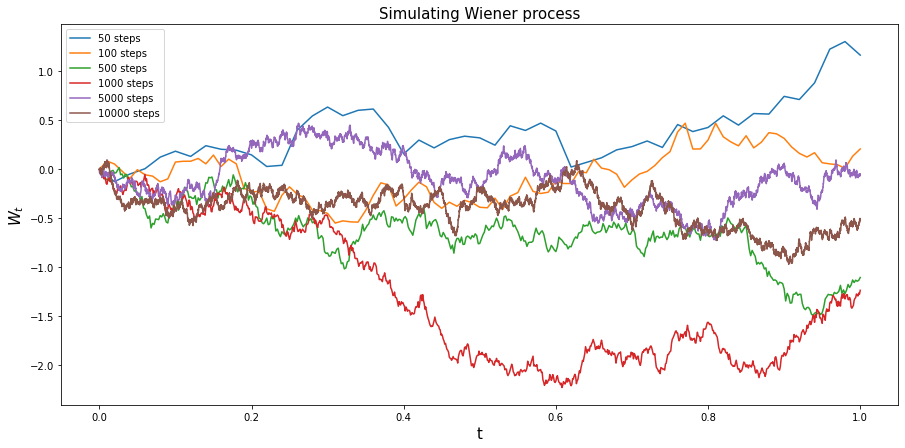

In [6]:
import math
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15,7]

def simulate_wiener_paths( T, n_paths, n):
    """
    Simulate discrete time Wiener Process paths.
    n = Number of steps.
    n+1 = Number of Points.
    n_paths = Number of Paths/Scenarios.
    """
    W = np.zeros( [ n_paths, n+1] )
    dt = T/n
    times = np.linspace(0,T,n+1)
    
    epsilon = np.random.randn( n_paths, n )
    for i in range(0,n):
        W[:,i+1] = W[:,i] + np.sqrt(dt)*epsilon[:,i]
           
    return W, times

def plot_wiener( T, n ):
    W,times = simulate_wiener_paths(T,1,n)  # Here n_paths = 1.
    plt.plot(times, W[0,:], label='{} steps'.format(n))

for n in [50,100,500,1000,5000,10000]:
    plot_wiener(1,n)  # Plot Wiener process over time interval 0 to 1 for different No. of steps.

plt.xlabel('t',fontsize = 15)
plt.ylabel('$W_t$',fontsize = 15)
plt.title('Simulating Wiener process', fontsize = 15)
plt.legend();

Notice the graphs will not converge as n tends to infinity. Each time we change n and generate a new plot we get an essentially different path which may be a long way from the original path. The issue is that as we change n, we are also changing the random numbers used to generate the graph and the final point on above graph keeps jumping around.
However, we may feel that there is some sort of convergence taking place as n tends to infinity. Is there some
way that we can change n but in some sense fix the random numbers used so that we obtain convergence
as n tends to infinity. Wiener found a way to do this and this gives his construction of continuous time
Brownian motion.(such that we can get the continuous limit)

## Wiener Processes
**Definition:** A stochastic process $W_t$ is called a Wiener process for $t \in {\mathbb R}_{\geq 0}$ if it satsisfies the following

* $W_{0}=0$
* $W$ has independent increments. For every $t>0$, the increments $W_{t+u}-W_t$ for $u>0$ are independendent of the past values
$W_s$ for $s \leq t$.
* The increments $W_{t+u}-W_t$ are normally distributed with mean $0$ and standard deviation $\sqrt{u}$.
* $W_t$ is almost surely continuous in $t$.